In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import time
sns.set()

In [5]:
%pip install kaggle
%pip install jupyter 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
#load the data directly from Kaggle later


In [27]:
#Load data from local folder (Mac):

action_movie = pd.read_csv('/Users/zdycho/Downloads/archive/action.csv')
crime_movie = pd.read_csv('/Users/zdycho/Downloads/archive/crime.csv')
adventure_movie = pd.read_csv('/Users/zdycho/Downloads/archive/adventure.csv')
thriller_movie = pd.read_csv('/Users/zdycho/Downloads/archive/thriller.csv')
family_movie = pd.read_csv('/Users/zdycho/Downloads/archive/family.csv')
mystery_movie = pd.read_csv('/Users/zdycho/Downloads/archive/mystery.csv')
scifi_movie = pd.read_csv('/Users/zdycho/Downloads/archive/scifi.csv')
history_movie = pd.read_csv('/Users/zdycho/Downloads/archive/history.csv')
sports_movie = pd.read_csv('/Users/zdycho/Downloads/archive/sports.csv')
animation_movie = pd.read_csv('/Users/zdycho/Downloads/archive/animation.csv')
war_movie = pd.read_csv('/Users/zdycho/Downloads/archive/war.csv')
biography_movie = pd.read_csv('/Users/zdycho/Downloads/archive/biography.csv')
horror_movie = pd.read_csv('/Users/zdycho/Downloads/archive/horror.csv')
fantasy_movie = pd.read_csv('/Users/zdycho/Downloads/archive/fantasy.csv')
romance_movie = pd.read_csv('/Users/zdycho/Downloads/archive/romance.csv')
film_noir_movie = pd.read_csv('/Users/zdycho/Downloads/archive/film-noir.csv')

In [28]:
# Add genre column to each dataframe
action_movie['primary_genre'] = 'Action'
crime_movie['primary_genre'] = 'Crime'
adventure_movie['primary_genre'] = 'Adventure'
thriller_movie['primary_genre'] = 'Thriller'
family_movie['primary_genre'] = 'Family'
mystery_movie['primary_genre'] = 'Mystery'
scifi_movie['primary_genre'] = 'Sci-Fi'
history_movie['primary_genre'] = 'History'
sports_movie['primary_genre'] = 'Sports'
animation_movie['primary_genre'] = 'Animation'
war_movie['primary_genre'] = 'War'
biography_movie['primary_genre'] = 'Biography'
horror_movie['primary_genre'] = 'Horror'
fantasy_movie['primary_genre'] = 'Fantasy'
romance_movie['primary_genre'] = 'Romance'
film_noir_movie['primary_genre'] = 'Film-Noir'

In [29]:
# Concatenate all dataframes
df = pd.concat([action_movie, crime_movie, adventure_movie, thriller_movie,
                family_movie, mystery_movie, scifi_movie, history_movie,
                sports_movie, animation_movie, war_movie, biography_movie,
                horror_movie, fantasy_movie, romance_movie, film_noir_movie])

# Reset index
df = df.reset_index(drop=True)

# Preview the dataframe
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN,Action
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN,Film-Noir
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN,Film-Noir
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN,Film-Noir
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN,Film-Noir


In [30]:
#change "genre" column to "secondary_genre":
df.rename(columns = {'genre':'secondary_genre'}, inplace = True)

In [31]:
#delete "genre" from "secondary_genre" column:

#create function:
def remove_primary_genre(row):
    primary_genre = row['primary_genre']
    secondary_genres = row['secondary_genre']

    # Check if primary_genre is in the secondary_genres
    if primary_genre in secondary_genres:
        # Replace primary genre and any adjacent commas
        # Use strip to remove leading/trailing whitespace and commas
        new_secondary = secondary_genres.replace(primary_genre, '').replace(',,', ',').strip(', ')
    else:
        new_secondary = secondary_genres

    return new_secondary

#apply the function to each row:
df['secondary_genre'] = df.apply(remove_primary_genre, axis=1)


In [32]:
#delete NaN values from "gross(in $)" column: 
df = df[df['gross(in $)'].notna()]


In [33]:
#Delete redundant columns; "star_id" and "director_id":
#df = df.drop(['star_id', 'director_id'], axis=1) 

# fuck this shit because obviously we need the IDs ^^

In [35]:
#inspect "star" column: 
df['star'].value_counts()

William Shatner, \nLeonard Nimoy, \nDeForest Kelley, \nJames Doohan       21
Aoi Yûki, \nChiwa Saitô, \nEri Kitamura, \nKaori Mizuhashi                12
Patrick Stewart, \nJonathan Frakes, \nBrent Spiner, \nLeVar Burton        12
Adam Sandler, \nAndy Samberg, \nSelena Gomez, \nKevin James               10
Mike Myers, \nCameron Diaz, \nEddie Murphy, \nAntonio Banderas            10
                                                                          ..
Lucas Black, \nRobert Duvall, \nMelissa Leo, \nDeborah Ann Woll            1
James Woods, \nLouis Gossett Jr., \nBruce Dern, \nOliver Platt             1
William Tepper, \nKaren Black, \nMichael Margotta, \nBruce Dern            1
Scott Bakula, \nCorbin Bernsen, \nDennis Haysbert, \nTakaaki Ishibashi     1
Paulette Goddard, \nWilliam Bishop, \nJohn Ireland, \nOskar Homolka        1
Name: star, Length: 11987, dtype: int64

In [36]:
df['star'].unique()

array(["Chadwick Boseman, \nMichael B. Jordan, \nLupita Nyong'o, \nDanai Gurira",
       'Tom Cruise, \nTim Robbins, \nKelly McGillis, \nVal Kilmer',
       'Sam Worthington, \nZoe Saldana, \nSigourney Weaver, \nMichelle Rodriguez',
       ...,
       'Kirk Douglas, \nJan Sterling, \nRobert Arthur, \nPorter Hall',
       'Ray Milland, \nJane Wyman, \nPhillip Terry, \nHoward Da Silva',
       'Paulette Goddard, \nWilliam Bishop, \nJohn Ireland, \nOskar Homolka'],
      dtype=object)

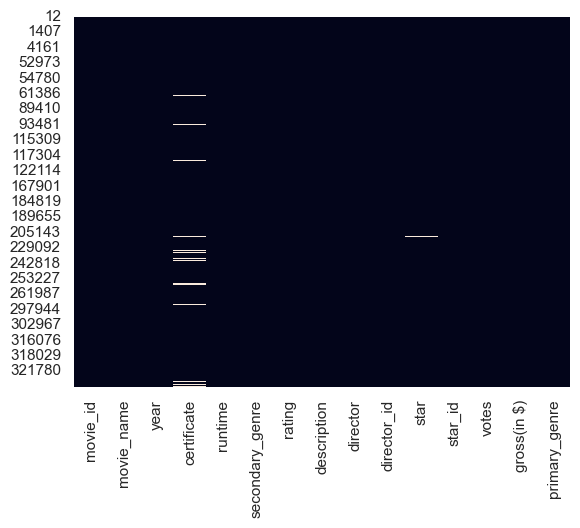

movie_id              0
movie_name            0
year                  0
certificate        1131
runtime              12
secondary_genre       0
rating                0
description           0
director              2
director_id           2
star                  9
star_id               2
votes                 0
gross(in $)           0
primary_genre         0
dtype: int64


In [38]:
#inspect columns for NaN values:
import seaborn as sns
import matplotlib.pyplot as plt

#heatmap to visualize NaN values in the DataFrame
sns.heatmap(df.isna(), cbar=False)
plt.show()

#print values:
nan_counts = df.isna().sum()
print(nan_counts)

In [ ]:
#calculate sum of column "gross(in $) where column "certificate" has NaN values: 
